<a href="https://colab.research.google.com/github/Shubham-0698/Netflix-Case-Study-Python/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Introduction

❓ What is Netflix? Netflix, Inc. is an American subscription streaming service and production company. It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals. As of March 31, 2023, with an estimated 232.5 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service. Founded by Reed Hastings and Marc Randolph in Scotts Valley, California, Netflix initially operated as a DVD sales and rental business. However, within a year, it shifted its focus exclusively to DVD rentals. In 2007, the company introduced streaming media and video on demand services, marking a significant step in its evolution.

🎯 Objective : Analyzing the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

📚 About Data : This tabular dataset consists of data as of mid-2021 , about 8807 movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. The data is available in a single csv file
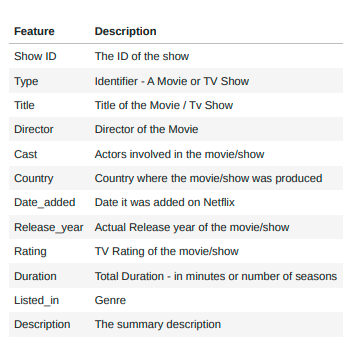

**Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
 df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [5]:
from datetime import datetime
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"], format="%B %d, %Y")

In [6]:
df['release_year']=pd.to_numeric(df['release_year'],errors='coerce')

In [7]:
#null value check
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
#Dropping rows with very less null values
df.dropna(subset=["date_added","rating","duration"], inplace=True)

In [9]:
df.fillna({
    "director": "Unknown_director",
    "cast": "Unknown_cast",
    "country": "Unknown_country"
}, inplace=True)
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [10]:
df["listed_in"] = df["listed_in"].str.split(", ")
df=df.explode("listed_in")

In [11]:
df["cast"]=df["cast"].str.split(", ")
df=df.explode("cast")
df['director']=df['director'].str.split(', ')
df=df.explode('director')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [12]:
#Univarite Analysis

In [13]:
df['country']=df['country'].str.strip()

In [14]:
df['country']=df['country'].str.split(', ')
df=df.explode('country')
df["country"] = df["country"].str.rstrip(",")

In [15]:
df.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,201763,201763,201763,201763,201763,201763,201763,201763,201763,201763
unique,8790,2,8790,4992,36393,124,14,220,42,8758
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown_director,Unknown_cast,United States,TV-MA,1 Season,Dramas,A troubled young girl and her mother find sola...
freq,700,145831,700,50425,2146,59263,73835,34977,29768,700


Observation:
1.   Total Unique Shows and Movies - 8790
2.   Total unique directors - 4527 and casts - 36393
3.   No of unique Countries - 128
4.   Most TV shows have 1 Season



In [16]:
#count no of Distinct show id movie and TV shows
df.groupby('type')['show_id'].nunique().reset_index()

,type,show_id
0,Movie,6126
1,TV Show,2664



*   There are more Moves than TV Shows


In [17]:
# % of no of Distinct show id movie and TV shows
# Calculate the percentage of distinct show IDs for movies and TV shows
show_id_counts = df.groupby('type')['show_id'].nunique()
total_show_ids = show_id_counts.sum()
percentage_movie = (show_id_counts['Movie'] / total_show_ids) * 100
percentage_tv_show = (show_id_counts['TV Show'] / total_show_ids) * 100

print(f"Percentage of distinct show IDs for Movies: {percentage_movie:.2f}%")
print(f"Percentage of distinct show IDs for TV Shows: {percentage_tv_show:.2f}%")


Percentage of distinct show IDs for Movies: 69.69%
Percentage of distinct show IDs for TV Shows: 30.31%


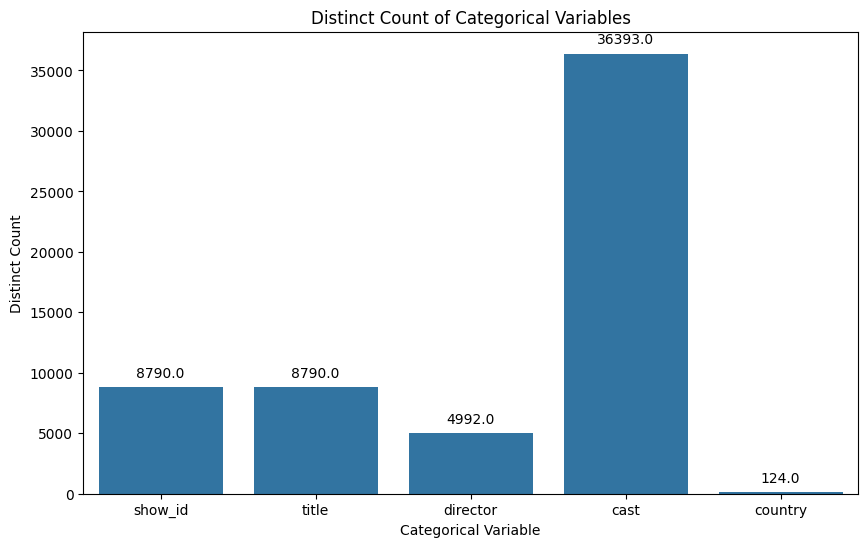

In [18]:
#ploting Distinct Count of Categorical Variable
cat=["show_id","title", "director", "cast", "country"]

# Iterate through each categorical column and create a separate countplot
distinct_count={col:df[col].nunique() for col in cat}

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(distinct_count.keys()), y=list(distinct_count.values()))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Categorical Variable')
plt.ylabel('Distinct Count')
plt.title('Distinct Count of Categorical Variables')
plt.show()

In [19]:
#Compering Movies Vs TV Shows
#no of moveies Produced in each country
Country_by_movies=df[df['type']=="Movie"].groupby('country')['show_id'].nunique().sort_values(ascending=False)
Country_by_movies=Country_by_movies.drop('Unknown_country')
Top_10_country_by_movies=Country_by_movies.head(10).reset_index()
Top_10_country_by_movies.rename(columns={'show_id':"Movie_Count"},inplace=True)

In [20]:
Top_10_country_by_movies

,country,Movie_Count
0,United States,2749
1,India,962
2,United Kingdom,534
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


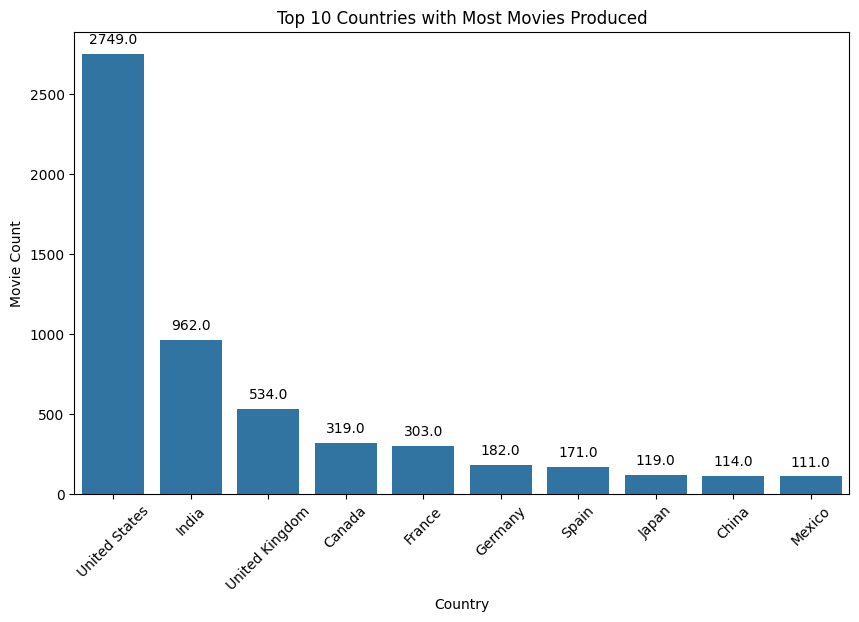

In [21]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='country', y='Movie_Count', data=Top_10_country_by_movies)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Country')
plt.ylabel('Movie Count')
plt.title('Top 10 Countries with Most Movies Produced')
plt.xticks(rotation=45)
plt.show()

In [22]:
Country_By_TV_Shows=df[df['type']=='TV Show'].groupby('country')['show_id'].nunique().sort_values(ascending=False)
Country_By_TV_Shows=Country_By_TV_Shows.drop('Unknown_country')
Country_By_TV_Shows

,show_id
country,
United States,932
United Kingdom,271
Japan,197
South Korea,170
Canada,126
...,...
Switzerland,1
Hungary,1
Malta,1


In [23]:
Top_10_country_by_TV_shows=Country_By_TV_Shows.head(10).reset_index()
Top_10_country_by_TV_shows.rename(columns={'show_id':"TV_Show_count"},inplace=True)
Top_10_country_by_TV_shows

,country,TV_Show_count
0,United States,932
1,United Kingdom,271
2,Japan,197
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,64
9,Spain,61


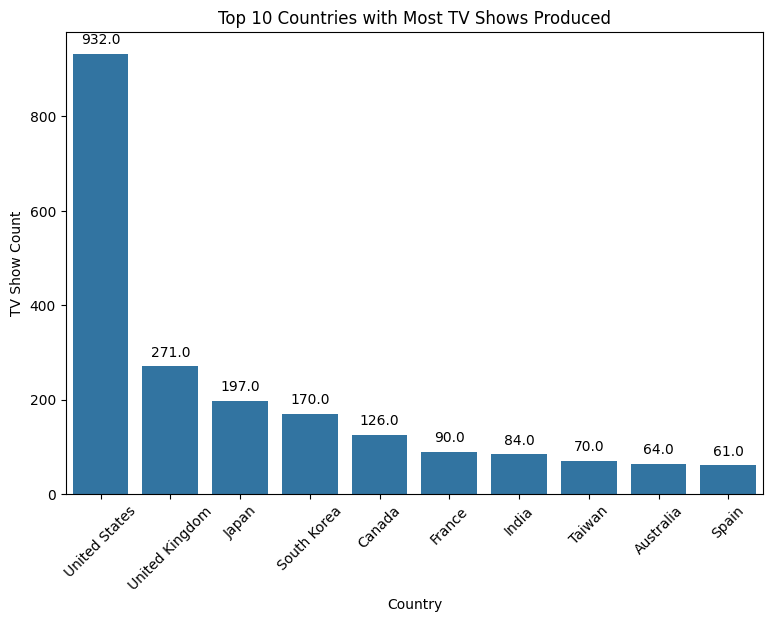

In [24]:
plt.figure(figsize=(9, 6))
ax=sns.barplot(x='country', y='TV_Show_count', data=Top_10_country_by_TV_shows)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Country')
plt.ylabel('TV Show Count')
plt.title('Top 10 Countries with Most TV Shows Produced')
plt.xticks(rotation=45)
plt.show()

Insight:
1. US has most moives as well as TV-Shows showing high demand for both.
2. Followed By US india has which is 2nd in terms of movies but very less TV shows showing Movies are more popular than TV shows.
3. In Asian countries shuch as Japan and south koria TV shows are more in demand than movies.


Understanding Split of Movies and Tv Shoes


---



In [25]:
df_movie_TV_total=df.groupby('country')['show_id'].nunique().sort_values(ascending=False).drop('Unknown_country').reset_index().rename(columns={'show_id':'Show_Count'})

In [26]:
#Creating a merger Table of top countries and Total shows, Movie COunt and TV show count
df_merge=pd.merge(df_movie_TV_total,Top_10_country_by_TV_shows,on='country', how='left')
df_merge=pd.merge(df_merge,Top_10_country_by_movies,on='country', how='left')
df_merge=df_merge.sort_values(by='Show_Count',ascending=False).head(10)
df_merge['TV_Show_count']=df_merge['TV_Show_count'].fillna(df_merge['Show_Count']-df_merge['Movie_Count'])
df_merge['Movie_Count']=df_merge['Movie_Count'].fillna(df_merge['Show_Count']-df_merge['TV_Show_count'])
df_merge.rename(columns={'Show_Count':'Total_Show_Count'},inplace=True)
df_merge['TV_show_%']=round((df_merge['TV_Show_count']/df_merge['Total_Show_Count'])*100,2)
df_merge['Movie_%']=round((df_merge['Movie_Count']/df_merge['Total_Show_Count'])*100,2)
df_merge=df_merge.sort_values(by='Movie_%',ascending=False)
df_merge

,country,Total_Show_Count,TV_Show_count,Movie_Count,TV_show_%,Movie_%
1,India,1046,84.0,962.0,8.03,91.97
8,Germany,226,44.0,182.0,19.47,80.53
4,France,393,90.0,303.0,22.90,77.10
0,United States,3681,932.0,2749.0,25.32,74.68
6,Spain,232,61.0,171.0,26.29,73.71
3,Canada,445,126.0,319.0,28.31,71.69
2,United Kingdom,805,271.0,534.0,33.66,66.34
9,Mexico,169,58.0,111.0,34.32,65.68
5,Japan,316,197.0,119.0,62.34,37.66
7,South Korea,231,170.0,61.0,73.59,26.41


<ipython-input-27-5a6efebf247e>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_merge["country"], rotation=45, ha="right")  # Rotate country labels


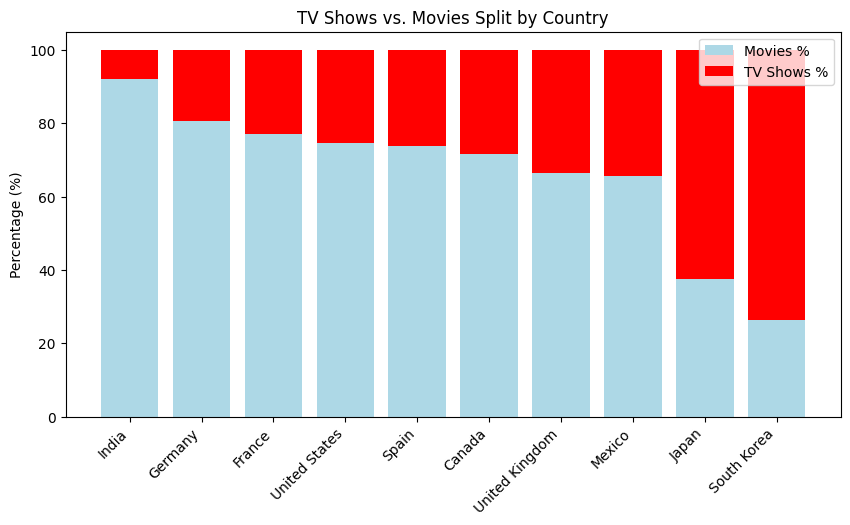

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_merge["country"], df_merge["Movie_%"], label="Movies %", color="lightblue")
ax.bar(df_merge["country"], df_merge["TV_show_%"], bottom=df_merge["Movie_%"], label="TV Shows %", color="Red")

# Labels & Formatting
ax.set_ylabel("Percentage (%)")
ax.set_title("TV Shows vs. Movies Split by Country")
ax.set_xticklabels(df_merge["country"], rotation=45, ha="right")  # Rotate country labels
ax.legend()
plt.show()

Insight: Content Preferences

TV shows are more popular than movies in Asian countries , especially South Korea and Japan, where they account for more than 60% of the content.

Movies are more popular than TV shows in European countries ,where they account for more than 65% of the content.

India has the highest percentage of movies (92%) among all the countries, which may indicate a high demand for movies.

North American countries have similar movie percentages (around 70%) and similar TV show percentages (around 30%) as each other,suggesting a similar
preference or taste among these markets.



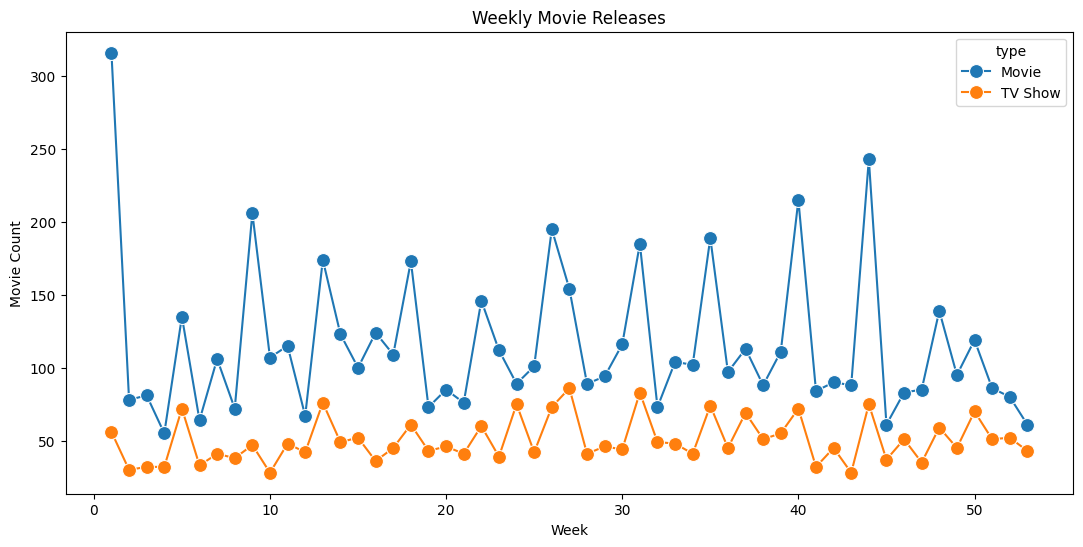

In [28]:
#best time to launch a tv show or a movie:
#movie - - weekly analysis of no of Movie resealed
df["added_week"]=df["date_added"].dt.isocalendar().week
df_Weely_release=df.groupby(['added_week','type'])['show_id'].nunique().reset_index()
df_Weely_release=df_Weely_release.rename(columns={'show_id':'Movie_Count'})
plt.figure(figsize=(13, 6))
ax=sns.lineplot(x='added_week', y='Movie_Count', data=df_Weely_release, hue='type', marker = 'o',markersize = 10)
plt.xlabel('Week')
plt.ylabel('Movie Count')
plt.title('Weekly Movie Releases')
plt.show()

Consistent Patterns--
1. The weekly upload count of both Movies and TV shows exhibits a remarkably similar trend with respect to spikes and dips.
2. A unique pattern can be observed in terms of spikes and dips. During a specific week, there is a noticeable increase in content uploads, followed by a three-week period of reduced content addition. This pattern might indicate a monthly cycle wherein the majority of content is uploaded during the first week and the initial week of the subsequent month.
3. The highest volume of movies are typically uploaded during the initial week of the year. The highest volume of TV shows tends to be added in the 26th week (around June end)

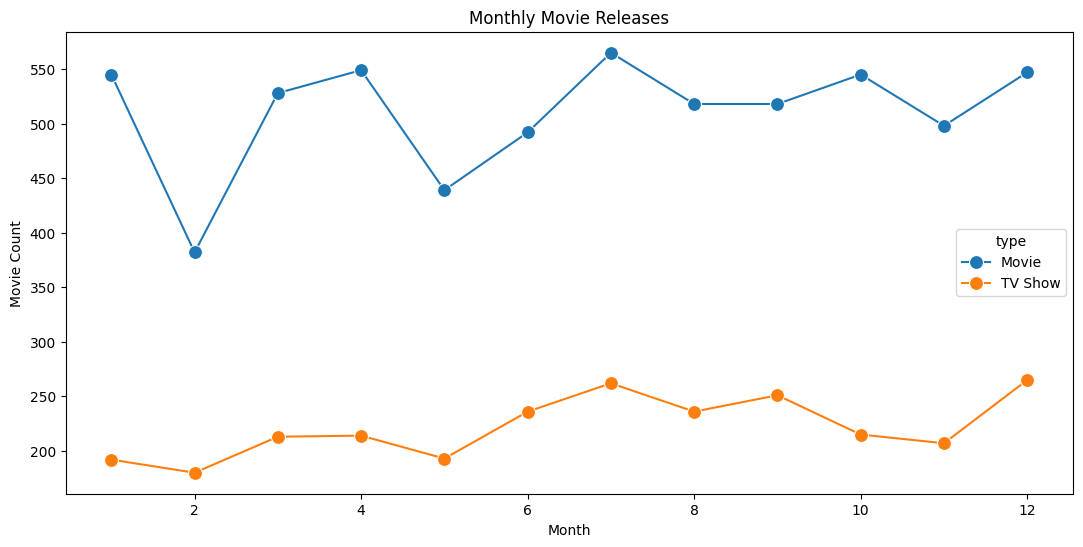

In [29]:
#monthly Analysis
df["month_added"]=df["date_added"].dt.month
df_Monthly_count=df.groupby(["month_added", 'type'])['show_id'].nunique().reset_index()
df_Monthly_count=df_Monthly_count.rename(columns={'show_id':'Movie_Count'})
plt.figure(figsize=(13, 6) )
ax=sns.lineplot(x='month_added', y='Movie_Count', data=df_Monthly_count, hue='type', marker = 'o',markersize = 10)
plt.xlabel('Month')
plt.ylabel('Movie Count')
plt.title('Monthly Movie Releases')
plt.show()

Insight:
1. On monthly bises the Trend in Similar with respect to spikes and dips.
2. Month of July sees the higest no of movies and for TV- shows its month of December
3. Seasonal Fluctuations There is a notable correlation between content uploads and holiday seasons, with January and December witnessing significant spikes in content additions.
4. The months of July, August, October, and December record higher content upload counts, whereas February, May, and November experience comparatively lower
counts.


In [30]:
#4. Analysis of actors/directors of different types of shows/movies.
#top 10 directors who have appeared in most movies or TV shows.
df_movie=df[df['type']=='Movie'].copy()
Top_directors=df_movie.groupby('director')['show_id'].nunique().sort_values(ascending=False)[1:11].reset_index()
Top_10_directors=Top_directors.head(10).rename(columns={'show_id':'Movie_Count'})

In [31]:
Top_10_directors

,director,Movie_Count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,15
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


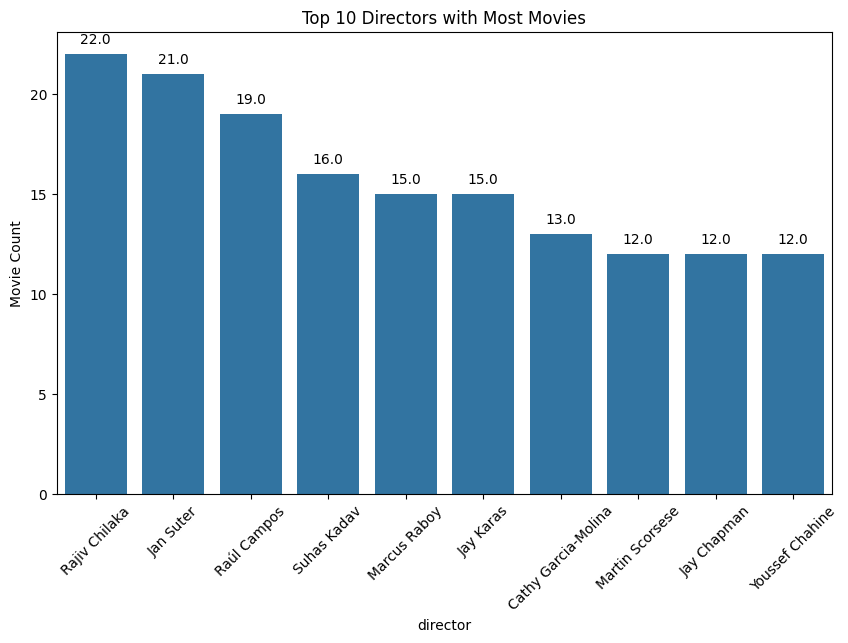

In [32]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='director', y='Movie_Count', data=Top_10_directors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('director')
plt.ylabel('Movie Count')
plt.title('Top 10 Directors with Most Movies')
plt.xticks(rotation=45)
plt.show()

In [33]:
#Top Casts with most movies(Dropping Unknown Cast)
Top_Casts=df_movie.groupby('cast')['show_id'].nunique().sort_values(ascending=False).reset_index()[1:]

In [34]:
Top_10_Casts=Top_Casts.rename(columns={'show_id':'Movie_Count'}).head(10)
Top_10_Casts

,cast,Movie_Count
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Om Puri,30
5,Akshay Kumar,30
6,Paresh Rawal,28
7,Amitabh Bachchan,28
8,Julie Tejwani,28
9,Rupa Bhimani,27
10,Boman Irani,27


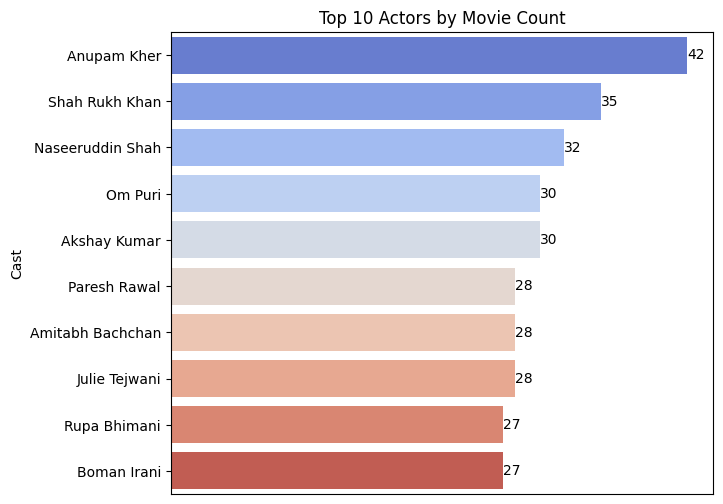

In [35]:
plt.figure(figsize=(7, 6))
ax=sns.barplot(y=Top_10_Casts["cast"], x=Top_10_Casts["Movie_Count"], hue=Top_10_Casts["cast"], palette="coolwarm", legend=False)
for bar in ax.patches:
    ax.annotate(f"{int(bar.get_width())}",  # Convert count to integer
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Position
                ha="left", va="center", fontsize=10, color="black")
ax.set_xlabel("")
ax.set_xticks([])
plt.ylabel("Cast")
plt.title("Top 10 Actors by Movie Count")
plt.show()

In [36]:
#Director by TV Shows Count
df_tv=df[df['type']=='TV Show'].copy()
Top_directors_by_TV=df_tv.groupby('director')['show_id'].nunique().sort_values(ascending=False).reset_index()[1:]
Top_10_directors_by_TV=Top_directors_by_TV.head(10).rename(columns={'show_id':'TV_Show_Count'})
Top_10_directors_by_TV

,director,TV_Show_Count
1,Ken Burns,3
2,Alastair Fothergill,3
3,Stan Lathan,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
6,Gautham Vasudev Menon,2
7,Iginio Straffi,2
8,Lynn Novick,2
9,Shin Won-ho,2
10,Rob Seidenglanz,2


In [37]:
Cast_by_Tv_show=df_tv.groupby("cast")['show_id'].nunique().sort_values(ascending=False).reset_index()[1:]
Top_10_Casts_TV_show=Cast_by_Tv_show.head(10).rename(columns={'show_id':'TV_Show_Count'})
Top_10_Casts_TV_show

,cast,TV_Show_Count
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Junichi Suwabe,17
4,Daisuke Ono,17
5,Yuichi Nakamura,16
6,Ai Kayano,16
7,Yoshimasa Hosoya,15
8,Jun Fukuyama,15
9,David Attenborough,14
10,Mamoru Miyano,13


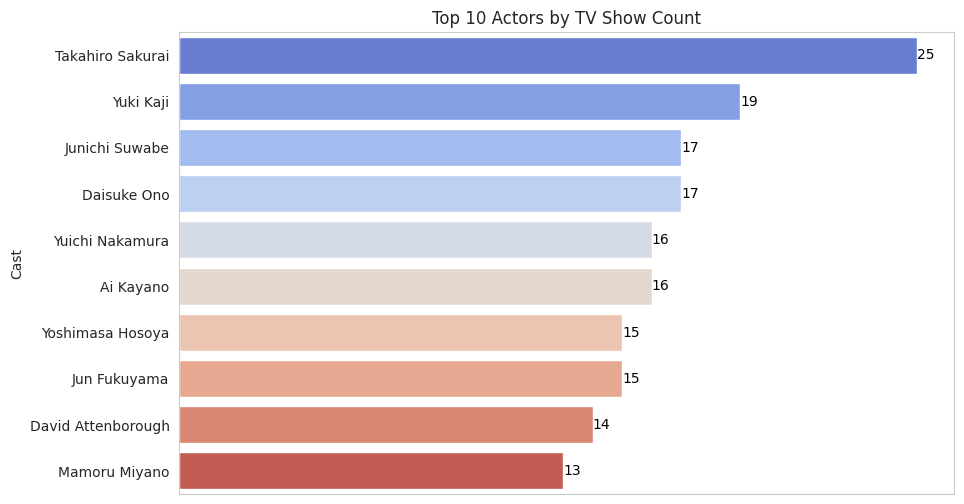

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=Top_10_Casts_TV_show['TV_Show_Count'], y=Top_10_Casts_TV_show['cast'], hue=Top_10_Casts_TV_show['cast'], palette="coolwarm")
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')
ax.set_xlabel('')
ax.set_xticks([])
plt.ylabel('Cast')
plt.title('Top 10 Actors by TV Show Count')
plt.show()

Analysis of different genre's for Movies and TV Shows present on Netflix.



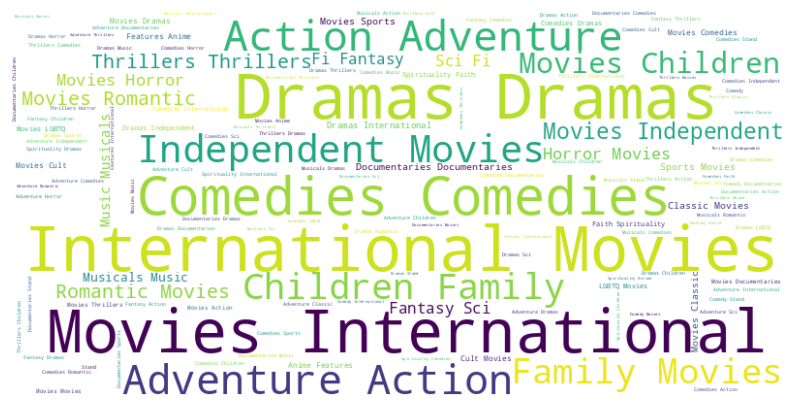

In [39]:
#5. Which genre movies are more popular or produced more
#word cloud for listed_in
from wordcloud import WordCloud
text=" ".join(df_movie['listed_in'].dropna())
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

insight- in movies genres shuch as Drama, International Movies, Comady movies, Adventure and action are the most in demand.

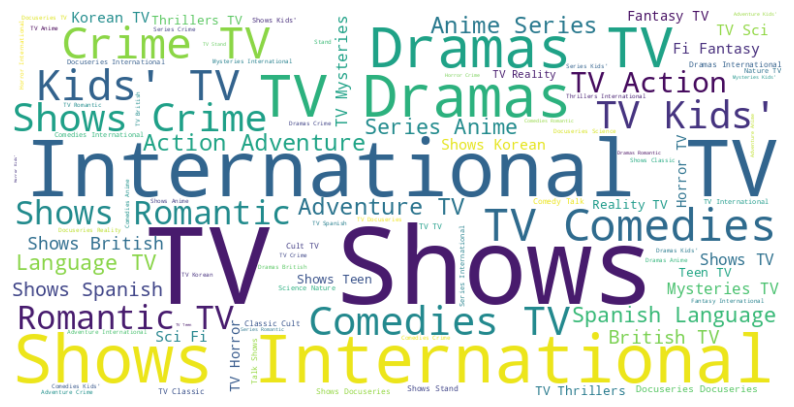

In [40]:
text=" ".join(df_tv['listed_in'].dropna())
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Insight:- For Tv Shows International TV, Drama TV, Comady, Kids TV, Show Crime are most popular geners.

🔞 Exploring Netflix Content Ratings
Rating distribution for Movies and TV shows on Netflix

In [41]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [42]:
#Rating Distribution for Movies
movie_rating=df[df['type']=="Movie"].copy()
tv_rating=df[df['type']=="TV Show"].copy()
def agegroup(x):
  if x in ['TV-Y', 'TV-G', 'G']:
    return 'Little Kids'
  elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
    return 'Older Kids'
  elif x in ['PG-13','TV-14']:
    return 'Teens'
  else:
    return 'Adults'
movie_rating['age_group']=movie_rating['rating'].apply(agegroup)
tv_rating['age_group']=tv_rating['rating'].apply(agegroup)

In [43]:
rating_count=movie_rating.groupby(['age_group','rating'])['show_id'].nunique().reset_index()
rating_count=rating_count.sort_values(by=['age_group','show_id'],ascending=[True,False])
rating_count

,age_group,rating,show_id
3,Adults,TV-MA,2062
2,Adults,R,797
1,Adults,NR,75
0,Adults,NC-17,3
4,Adults,UR,3
7,Little Kids,TV-Y,131
6,Little Kids,TV-G,126
5,Little Kids,G,41
9,Older Kids,TV-PG,540
8,Older Kids,PG,287


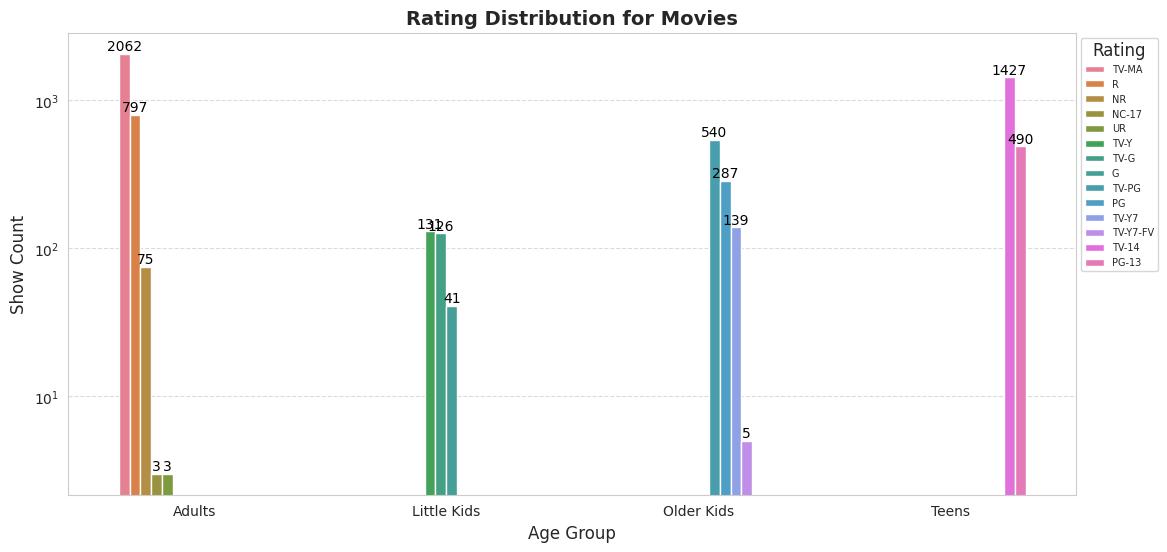

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 6))  # Increase figure size for better readability

# Use 'dodge' in sns.barplot to control spacing between groups
ax = sns.barplot(rating_count, x="age_group", y="show_id", hue="rating", dodge=True, width=0.6)
plt.yscale('log')  # Set the y-axis to a logarithmic scale

# Increase bar width by modifying linewidth and edgecolor
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

ax.set_xticks(range(len(rating_count['age_group'].unique())))
ax.set_xticklabels(rating_count['age_group'].unique())

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Show Count', fontsize=12)
plt.title('Rating Distribution for Movies', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Rating", fontsize=7, loc='upper left', bbox_to_anchor=(1, 1) , title_fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for readability
# Adjust layout for better spacing
plt.show()


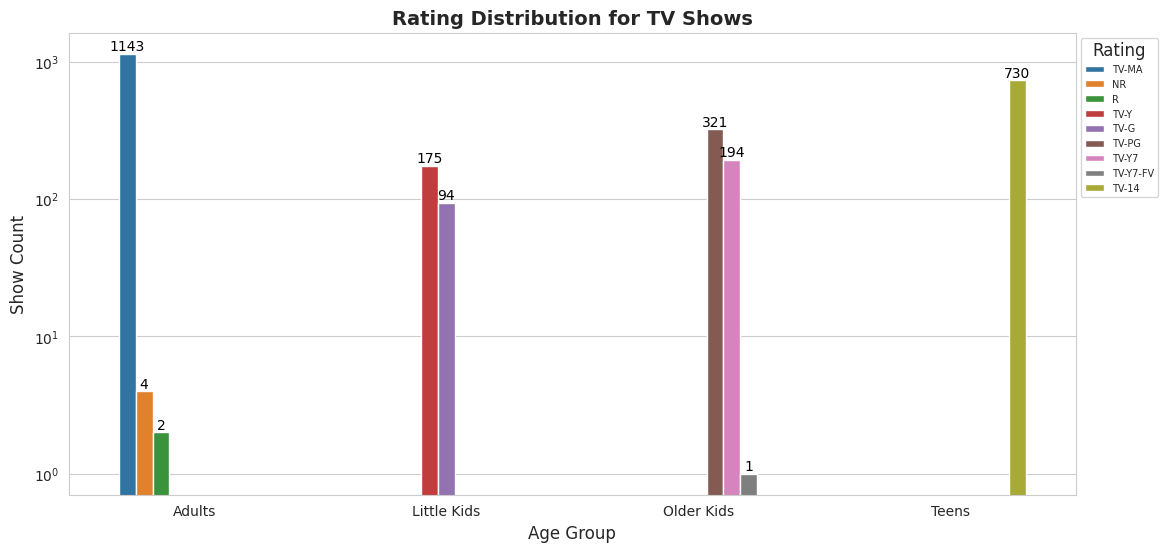

In [45]:
rating_count_tv=tv_rating.groupby(['age_group','rating'])['show_id'].nunique().reset_index()
rating_count_tv=rating_count_tv.sort_values(by=['age_group','show_id'],ascending=[True,False])
#ploting The count
plt.figure(figsize=(13, 6))
ax=sns.barplot(rating_count_tv, x="age_group", y="show_id", hue="rating", dodge=True, width=0.6)
plt.yscale('log')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Show Count', fontsize=12)
plt.title('Rating Distribution for TV Shows', fontsize=14, fontweight='bold')
plt.legend(title="Rating", fontsize=7, loc='upper left', bbox_to_anchor=(1, 1) , title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [46]:
#Age and Demographics
df_movie=movie_rating.groupby(['country','age_group'])['show_id'].nunique().reset_index()
df_tv=tv_rating.groupby(['country','age_group'])['show_id'].nunique().reset_index()

In [47]:
df_movie.sort_values(by=['country','show_id'],ascending=False)
df_movie=Top_10_country_by_movies.merge(df_movie,on='country',how='left')
df_movie.rename(columns={'show_id':'Movie_Count_1'},inplace=True)

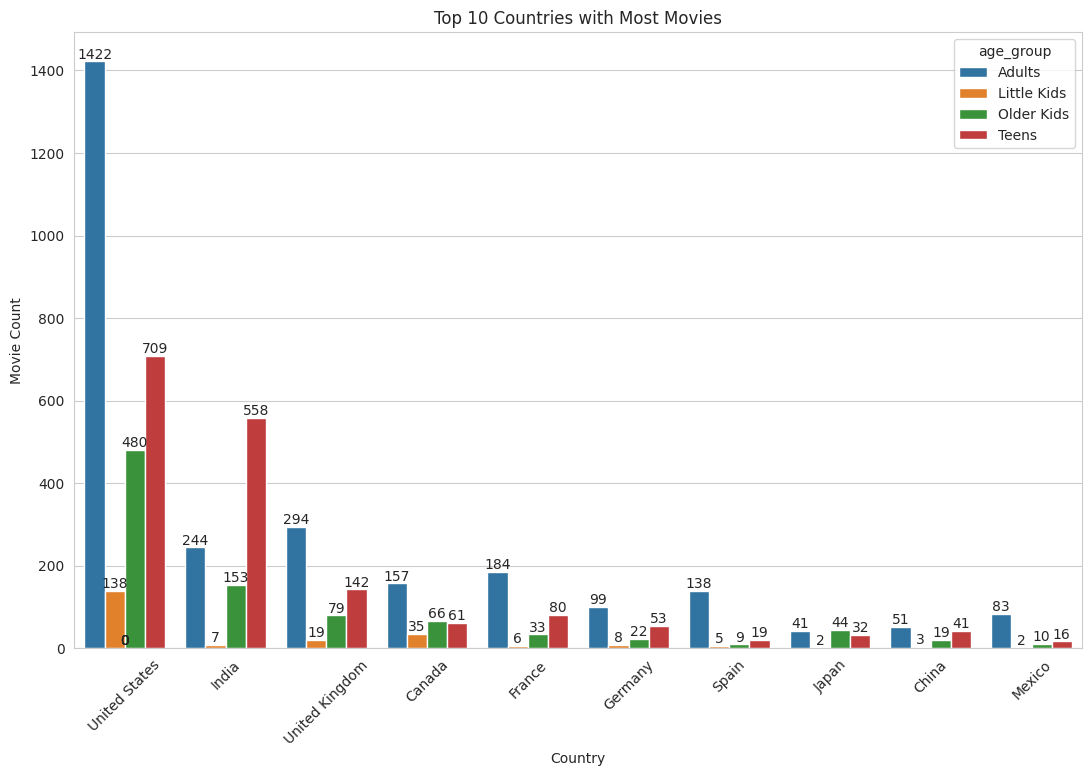

In [48]:
plt.figure(figsize=(13, 8))
ax=sns.barplot(x='country', y='Movie_Count_1',hue='age_group', data=df_movie,  dodge=True)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.xlabel('Country')
plt.ylabel('Movie Count')
plt.title('Top 10 Countries with Most Movies')
plt.xticks(rotation=45)
plt.show()

In [49]:
def percent(x):
  x["Percent"]=round((x['Movie_Count_1']/x['Movie_Count']),2)
  return x
df_movie=df_movie.groupby('country').apply(percent)
df_heatmap=df_movie.pivot(index='age_group',columns='country',values='Percent')
df_heatmap

<ipython-input-49-f26af0453c6b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_movie=df_movie.groupby('country').apply(percent)


country,Canada,China,France,Germany,India,Japan,Mexico,Spain,United Kingdom,United States
age_group,,,,,,,,,,
Adults,0.49,0.45,0.61,0.54,0.25,0.34,0.75,0.81,0.55,0.52
Little Kids,0.11,0.03,0.02,0.04,0.01,0.02,0.02,0.03,0.04,0.05
Older Kids,0.21,0.17,0.11,0.12,0.16,0.37,0.09,0.05,0.15,0.17
Teens,0.19,0.36,0.26,0.29,0.58,0.27,0.14,0.11,0.27,0.26


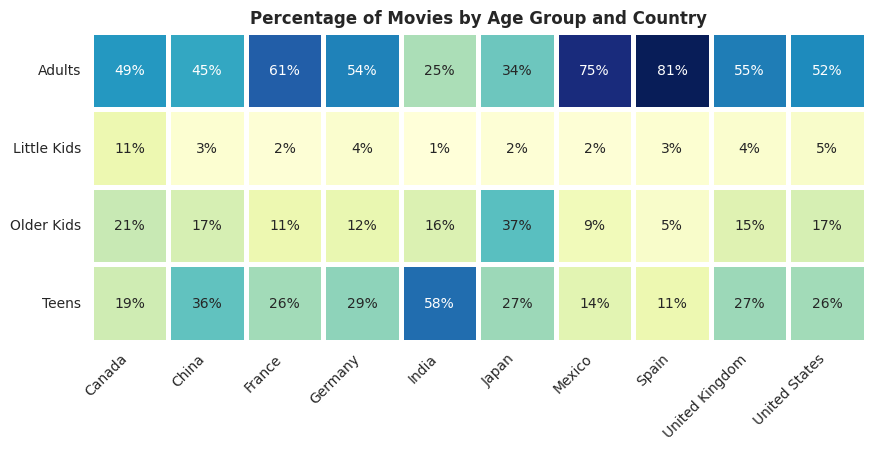

In [50]:
plt.figure(figsize=(10, 8))
ax=sns.heatmap(df_heatmap, annot=True ,cmap="YlGnBu", fmt=".0%", linewidths=2.5, square=True,cbar = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title("Percentage of Movies by Age Group and Country", fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

Teen-Centric Content in India, Japan and S Korea

---
India and Japan stand out for having a considerably higher percentage of content targeted at "Teens." In Japan the trend continues to Older Kids as well. This suggests
that there's a trend towards producing content that appeals to this age group
Adult-Centric Content in Spain, Mexico,Germany and France


---
Spain,Mexico,Germany and France have relatively high percentages of content aimed at "Adults." This could reflect a cultural inclination towards producing and consuming more mature content in these countries.

Balanced Content in USA,UK and Canada


---
USA,UK and Canada are closey aligned with their Netflix target ages suggesting a similar preference or taste among these market

In [51]:
#for TV shown
df_merge_tv=Top_10_country_by_TV_shows.merge(df_tv,on='country',how='left')
df_merge_tv.rename(columns={'show_id':'TV_Show_Count_1'},inplace=True)
def percent(x):
  x["Percent"]=round((x['TV_Show_Count_1']/x['TV_Show_count']),2)
  return x
df_merge_tv=df_merge_tv.groupby('country').apply(percent)
df_heatmap_tv=df_merge_tv.pivot(index='age_group',columns='country',values='Percent')
df_heatmap_tv

<ipython-input-51-c49acecb1032>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merge_tv=df_merge_tv.groupby('country').apply(percent)


country,Australia,Canada,France,India,Japan,South Korea,Spain,Taiwan,United Kingdom,United States
age_group,,,,,,,,,,
Adults,0.41,0.28,0.48,0.40,0.35,0.32,0.77,0.34,0.43,0.41
Little Kids,0.16,0.23,0.26,0.11,0.02,0.05,0.07,NaN,0.16,0.13
Older Kids,0.28,0.33,0.23,0.19,0.25,0.14,0.10,0.11,0.24,0.23
Teens,0.16,0.16,0.03,0.30,0.38,0.48,0.07,0.54,0.17,0.23


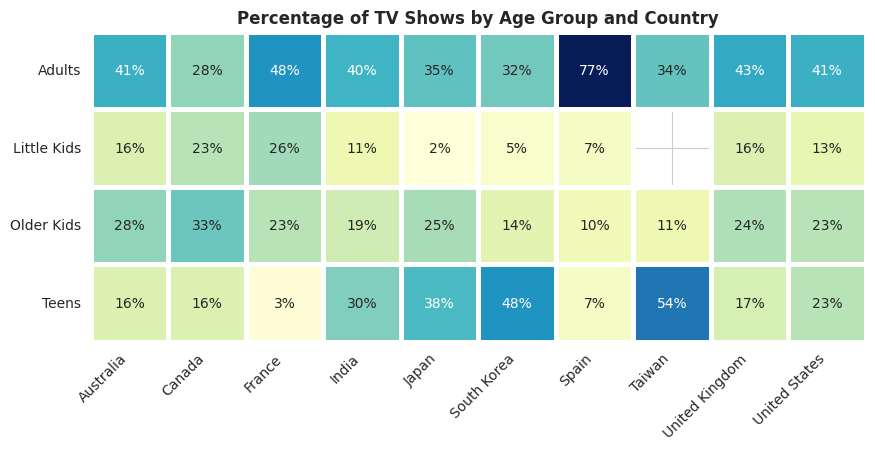

In [52]:
plt.figure(figsize=(10, 8))
ax=sns.heatmap(df_heatmap_tv, annot=True ,cmap="YlGnBu", fmt=".0%", linewidths=2.5, square=True,cbar = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title("Percentage of TV Shows by Age Group and Country", fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

insights:
Teen-Centric

---

Tiwan and South Korea have conciderable higher percentage of TV shows aimed at Teen, in japan trend continues followed by india.

Adult-Centric:

---
Eurapian Contries such as Spain, France, UK have higher contents aimed for Aduluts, Followed by US and Austrelia.

Balanced content:

---
India, Canada have Some what balace content





In [54]:
#time Between Release and netflix addition date
df_movie=df[df['type']=='Movie']
df["Year_gap"]=df['date_added'].dt.year - df['release_year']
df_merge=Top_10_country_by_movies.merge(df_movie,on='country',how='left')
df_timediff=df_merge.groupby('country')['Year_gap'].mean().sort_values(ascending=False)
df_timediff=df_timediff.reset_index()
df_timediff.rename(columns={'Year_gap':'Avg_Year_gap'},inplace=True)
df_timediff['Avg_Year_gap']=round(df_timediff['Avg_Year_gap'],0)
df_timediff

,country,Avg_Year_gap
0,United Kingdom,8.0
1,United States,8.0
2,India,8.0
3,Germany,7.0
4,Japan,6.0
5,France,6.0
6,Mexico,5.0
7,Canada,5.0
8,China,4.0
9,Spain,2.0


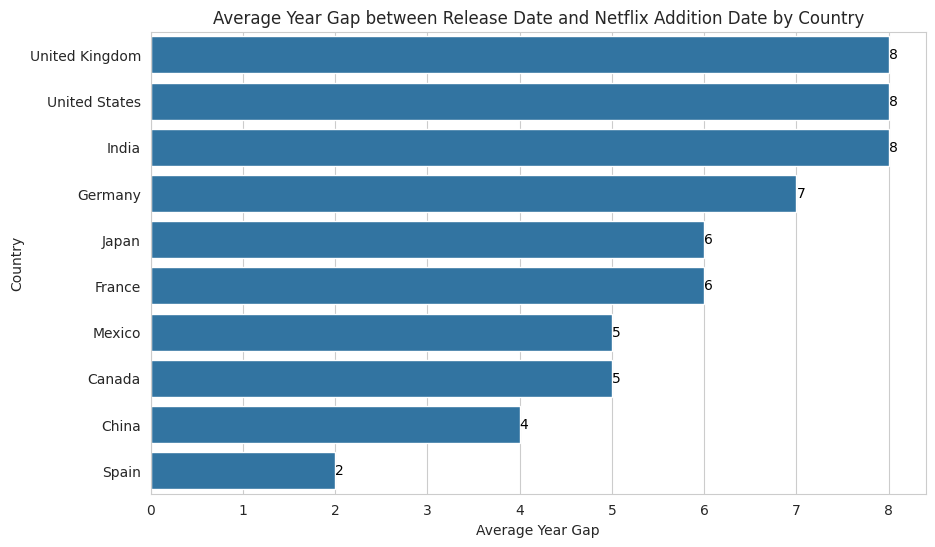

In [55]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Avg_Year_gap', y='country', data=df_timediff)
for bar in ax.patches:
    ax.annotate(f"{int(bar.get_width())}",  # Convert count to integer
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Position
                ha="left", va="center", fontsize=10, color="black")
plt.xlabel('Average Year Gap')
plt.ylabel('Country')
plt.title('Average Year Gap between Release Date and Netflix Addition Date by Country')
plt.show()

In [56]:
#For TV show
df_tv=df[df['type']=='TV Show']
df_age_gap=Top_10_country_by_TV_shows.merge(df_tv,on='country',how='left')
df_age_gap=df_age_gap.groupby('country')['Year_gap'].mean().sort_values(ascending=False)
df_age_gap=df_age_gap.reset_index()
df_age_gap.rename(columns={'Year_gap':'Avg_Year_gap'},inplace=True)
df_age_gap=round(df_age_gap,0)


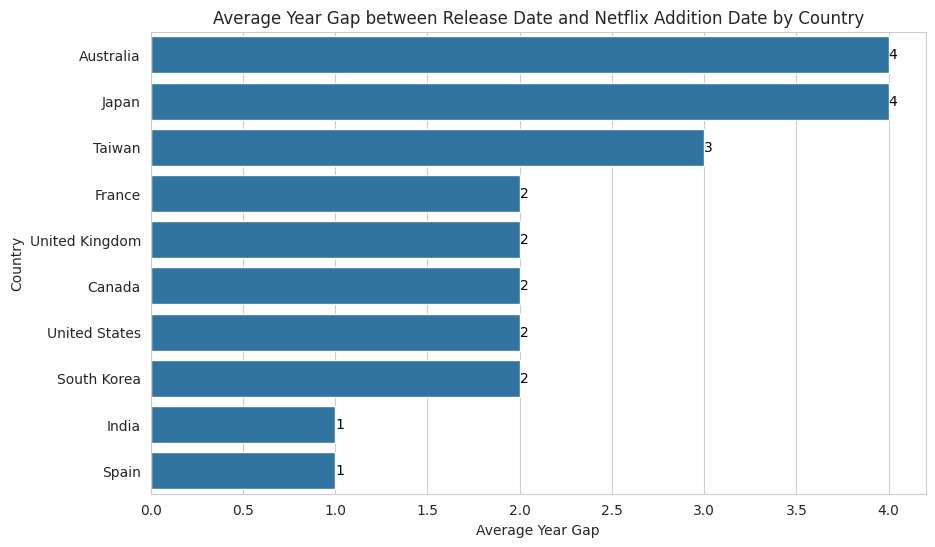

In [57]:
#ploting the same
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Avg_Year_gap', y='country', data=df_age_gap)
for bar in ax.patches:
    ax.annotate(f"{int(bar.get_width())}",  # Convert count to integer
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),  # Position
                ha="left", va="center", fontsize=10, color="black")
plt.xlabel('Average Year Gap')
plt.ylabel('Country')
plt.title('Average Year Gap between Release Date and Netflix Addition Date by Country')
plt.show()

Insight:
1. Movies Vs TV Shows
In general, there seems to be a trend of adding movies to Netflix with a longer delay compared to TV shows. This could indicate that viewers might have a higher
demand for recent TV shows than movies.
2. Variation in Regional Preferences
Spain has the lowest delay for movies (2 years) and TV shows (1 year), which could suggest that Spanish viewers have a preference for more recent content.
Countries like India, UK,USA and France have in general more delay in movies (8 to 6 years) and very less delay in TV Shows (1 to 3 years) indicating preference
for recent TV shows and older movies in these countries.
3. Japan has a consistent delay (5 to 6 years) in both Movies and TV Shows.


**Netflix's Movie and TV Show Runtimes**
Analysis of runtimes for Movies and TV shows on Netflix


In [64]:
df_tv_runtime=df[df['type']=='TV Show'].copy()
df_movie_runtime=df[df['type']=='Movie'].copy()
df_tv_runtime.replace({'1 Season':'1S',
 '2 Seasons':'2S to 3S','3 Seasons':'2S to 3S',
 '4 Seasons':'4S to 6S','5 Seasons':'4S to 6S','6 Seasons':'4S to 6S',
 '7 Seasons':'7S to 9S','8 Seasons':'7S to 9S','9 Seasons':'7S to 9S',
 '10 Seasons':'10S to 17S','11 Seasons':'10S to 17S','12 Seasons':'10S to 17S','13 Seasons':'10S to 17S',
 '14 Seasons':'10S to 17S','15 Seasons':'10S to 17S','16 Seasons':'10S to 17S','17 Seasons':'10S to 17S'},
 inplace = True)
df_tv_runtime=df_tv_runtime.groupby('duration')['show_id'].nunique().sort_values(ascending=False).reset_index()
df_tv_runtime.rename(columns={'show_id':'TV_Show_Count'},inplace=True)
df_tv_runtime

,duration,TV_Show_Count
0,1S,1791
1,2S to 3S,619
2,4S to 6S,191
3,7S to 9S,49
4,10S to 17S,14


In [65]:
#removing " min" from each eantry
df_movie_runtime['duration']=df_movie_runtime['duration'].str.replace(' min','').astype(int)
#crating bin for duration
bin= [0,30,90,150,210, float('inf')]
bin_label=["Short film", "Medium film", "Long film", "Very Long film", "Epic Films"]
df_movie_runtime['duration']=pd.cut(df_movie_runtime['duration'], bins=bin, labels=bin_label)
df_movie_runtime=df_movie_runtime.groupby('duration')['show_id'].nunique().sort_values(ascending=False).reset_index()
df_movie_runtime

<ipython-input-65-8b8e3916b1fb>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_movie_runtime=df_movie_runtime.groupby('duration')['show_id'].nunique().sort_values(ascending=False).reset_index()


,duration,show_id
0,Long film,3892
1,Medium film,1859
2,Very Long film,234
3,Short film,130
4,Epic Films,11


Recommendation:

1. Investment in Localized Content

Given the popularity of TV shows in Asian countries, particularly South Korea and Japan, Netflix should increase its investment in producing and acquiring Asian TV shows.

Acknowledging the European preference for movies, Netflix should prioritize curating a diverse and engaging movie library that caters to the tastes of European viewers.

Given the significant investment in content production in the USA and the emphasis on India, Netflix should continue to focus on these markets.

2. Strategic Release Timing

Monthly Strategy : Focusing on releasing high-quality content during the months of January, July, August, October, and December could lead to increased viewer interest and engagement as these months have historically seen higher content upload counts, indicating higher demand during those periods.

Weekly Strategy : The first week of each month can be designated as a "Featured Release Week," where the platform introduces a major TV show or movie. Subsequently, during the three-week period of reduced content additions, the platform can leverage this time to promote and highlight existing content

3. Age-Targeted Content Expansion

In India and Japan, where there is a high demand for teen-centric content, Netflix could partner with local production studios to develop original series and movies that resonate with the teenage audience.

For countries like Spain, Mexico, Germany, and France, where adult-centric content is favored, Netflix should invest in creating mature and sophisticated original content that aligns with the cultural sensibilities of these regions.

4. Diverse Runtimes

Since viewers prefer movies of standard length, Netflix should continue producing standard films that offer a well-rounded movie-watching experience.However, the popularity of "Medium length Films" suggests that there's an appetite for movies with more depth and storytelling.

Recognizing the popularity of shorter TV series, Netflix should continue focusing on producing limited series and shorter season formats. This approach aligns with viewer preferences for consuming content in manageable episodes.

5. Optimizing Content Acquisition Strategy

Given the trend of faster availability of TV shows compared to movies, Netflix could work on acquiring more recent movies and reducing the time lag between their theatrical release and availability on the platform. This could cater to the audience's preference for up-to-date TV shows and movies.
